# Simple Linear Regression

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df= pd.read_csv("Salary_Data.csv")

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
# set the independent and dependent variable, let x be independent and y be dependent variable
x=df[["YearsExperience"]] # we have to select 2 dimensional data for x
y=df["Salary"]
x.ndim

2

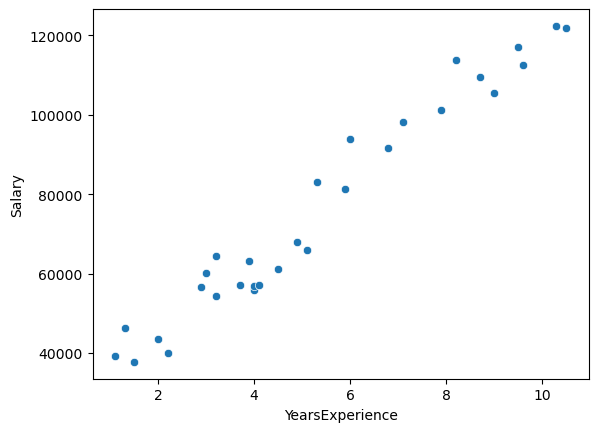

In [27]:
# independent variable in x-Axis,and dependent variable in Y-Axis
sns.scatterplot(x='YearsExperience',y='Salary',data=df)
plt.show()

In [28]:
# divide the dataset into training and test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# model training 
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
lr.predict([[1.1]]) # predecting the salary by years of experience

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([35687.77986711])

In [34]:
lr.score(x_test,y_test)*100 # Accuracy score

90.24461774180497

In [35]:
# Finding the slope(coefficient of x) and intercept
lr.coef_,lr.intercept_

(array([9423.81532303]), 25321.583011776813)

linear regresseion eq: y=mx+c

In [36]:
# calculationg y by puttinf m and c for different values of x
9423.81532303*(1.1) +25321.583011776813

35687.77986710981

In [38]:
y_pred=lr.predict(x)

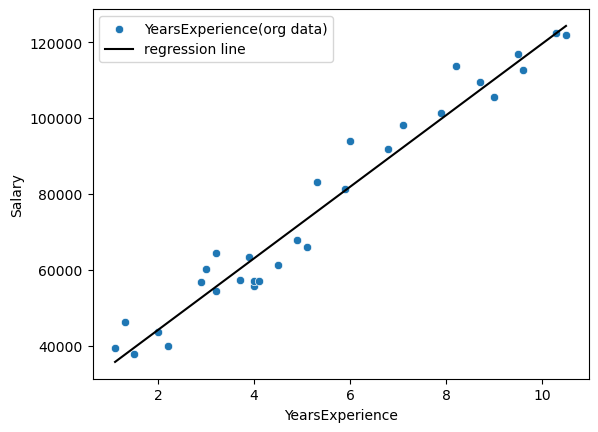

In [45]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df)
plt.plot(df["YearsExperience"],y_pred,c='black' )
plt.legend(["YearsExperience(org data)","regression line"])
plt.savefig("graph.jpg")
plt.show()

# Multiple Linear Regression

In [15]:
df1= pd.read_csv("multiple_linear_regression_dataset.csv")

In [16]:
df1.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [36]:
df1.shape

(20, 3)

In [17]:
df1.isnull().sum()

age           0
experience    0
income        0
dtype: int64

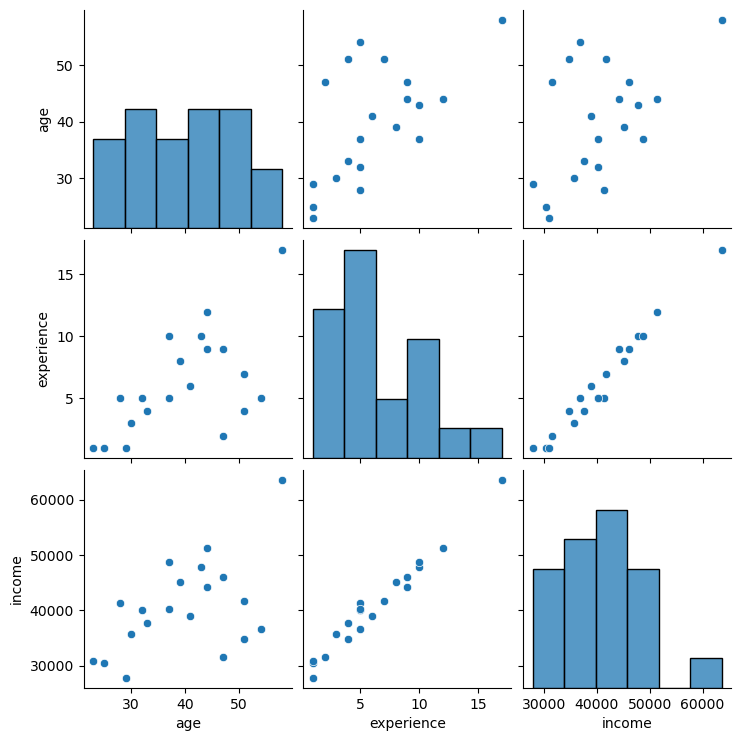

In [18]:
sns.pairplot(data=df1)
plt.show()

<Axes: >

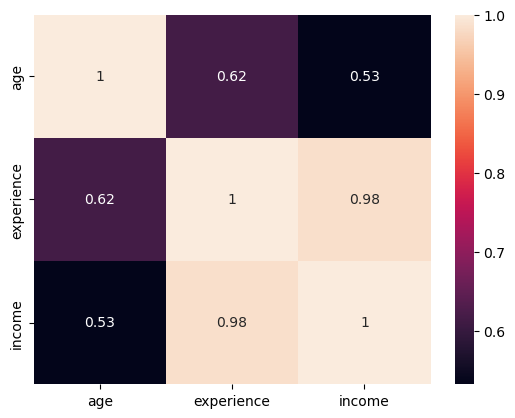

In [19]:
sns.heatmap(data=df1.corr(),annot=True)

In [27]:
x1=df1.iloc[:,:-1]
y1=df1["income"]

In [28]:
x1.columns

Index(['age', 'experience'], dtype='object')

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42) 
# when executing , just change variable name as it is also mentioned above

In [37]:
x_test

,age,experience
0,25,1
17,23,1
15,41,6
1,30,3


In [30]:
# model training 
lr1=LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [31]:
lr1.score(x_test,y_test)*100 # Accuracy score

93.87098237077886

In [35]:
lr1.predict(x_test)

array([31093.38107376, 31295.49954076, 40250.46080162, 34897.6958918 ])

 # Ridge and lasso REgression

In [12]:
df2 = pd.read_csv("house_price_regression_dataset.csv")

In [49]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
df2.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [15]:
#  checkking if the features are correalted or not, if the features are highly correalated then liner regressionn can be applied

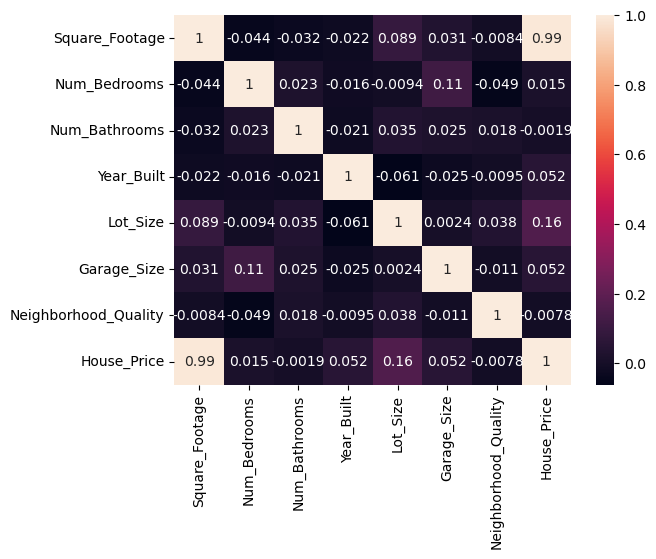

In [16]:
sns.heatmap(data=df2.corr(),annot=True)
plt.show()

In [18]:
x=df2.iloc[:,:-1]
y=df2["House_Price"]

In [25]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,-1.159803,-0.693836,-1.186699,-0.269122,-1.679278,-1.254658,-0.213126
1,1.160724,0.007008,1.252559,1.428045,1.522390,-0.027008,0.133420
2,0.618843,-1.394681,0.032930,1.428045,0.660422,-1.254658,1.173060
3,-1.473776,-1.394681,0.032930,-0.463084,-0.036555,-0.027008,0.826514
4,1.681887,-0.693836,-1.186699,0.312764,1.480809,-1.254658,0.826514
...,...,...,...,...,...,...,...
995,0.355074,0.707853,-1.186699,-0.414594,-0.472519,1.200641,1.519607
996,0.289730,-1.394681,0.032930,0.603707,0.153428,-0.027008,1.519607
997,-0.166885,0.707853,0.032930,-1.190442,0.984371,-1.254658,-1.252766
998,1.520119,1.408698,0.032930,-1.772328,-0.653046,-1.254658,0.479967


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
lr.score(x_test,y_test)*100

99.84263636823412

 MSE , MSA and RMSE
 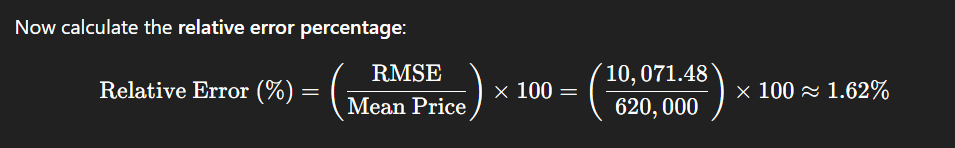

In [53]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

101434798.50563575
8174.5836000066065
10071.484424137077


In [54]:
y_test.mean()

620000.8755523002

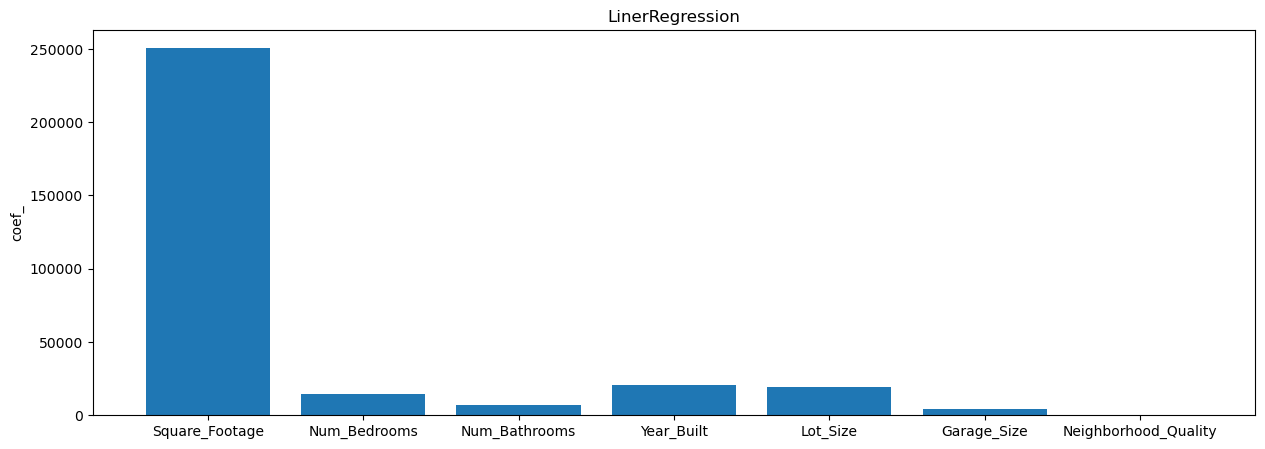

In [36]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.ylabel("coef_")
plt.title("LinerRegression")
plt.show()

# Ridge

In [37]:
ri=Ridge(alpha=0.5)
ri.fit(x_train,y_train)

Ridge(alpha=0.5)

In [38]:
ri.score(x_test,y_test)*100

99.8418606866934

In [55]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

101934793.96142593
8207.872044741933
10096.276242329443


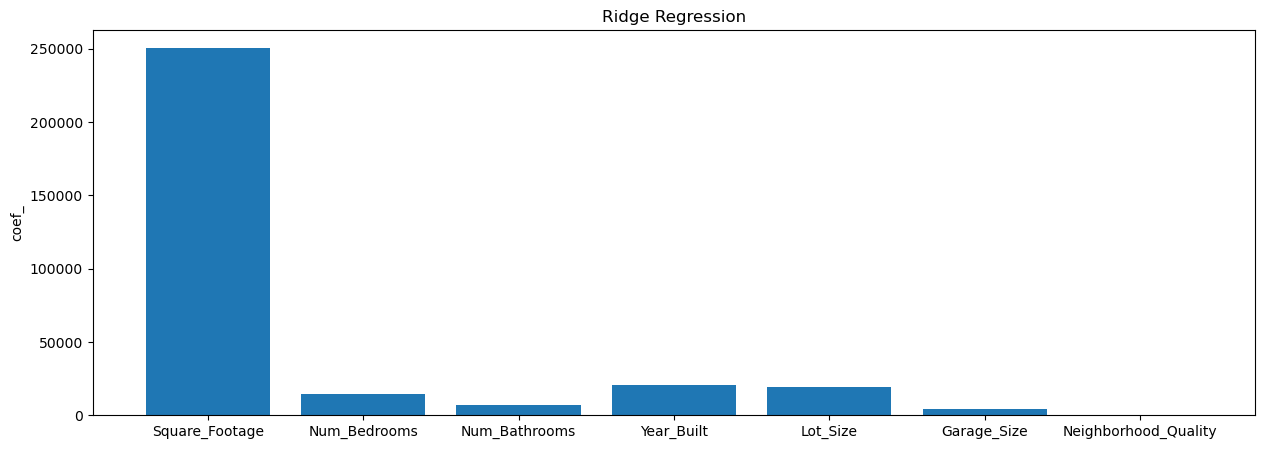

In [39]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.ylabel("coef_")
plt.title("Ridge Regression")
plt.show()

# Lasso

In [41]:
la=Lasso(alpha=0.5)
la.fit(x_train,y_train)

Lasso(alpha=0.5)

In [42]:
la.score(x_test,y_test)*100

99.84263489955391

In [56]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

101435745.20011738
8174.670373858996
10071.531422783597


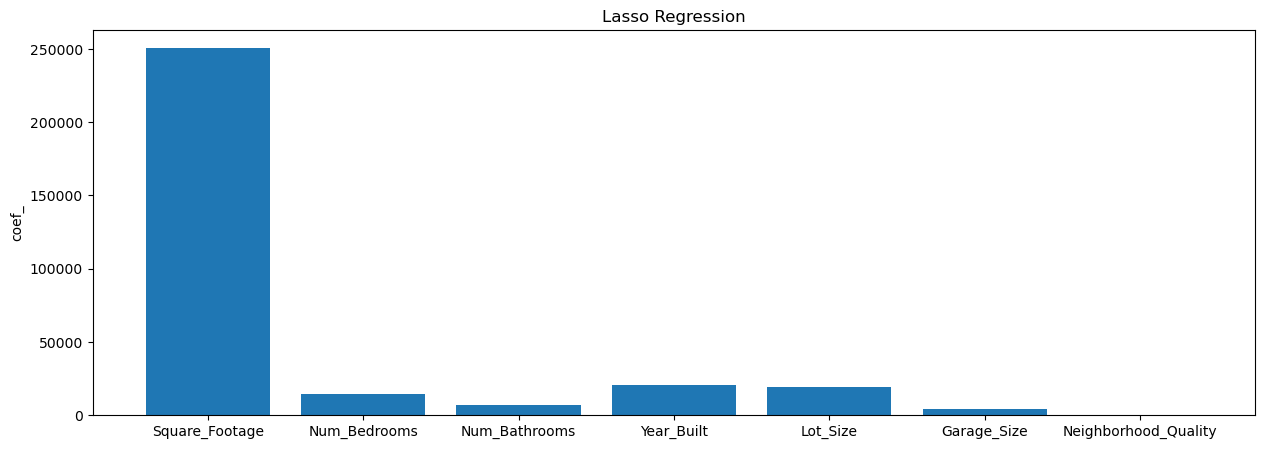

In [43]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.ylabel("coef_")
plt.title("Lasso Regression")
plt.show()

In [57]:
df_Understand=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Ridge":ri.coef_,"Lasso":la.coef_})

In [58]:
df_Understand

,col_name,LinearRegression,Ridge,Lasso
0,Square_Footage,250366.578812,250206.964594,250366.047189
1,Num_Bedrooms,14589.829628,14574.958045,14589.298498
2,Num_Bathrooms,6730.270823,6719.845632,6729.813728
3,Year_Built,20489.316514,20473.036117,20488.765219
4,Lot_Size,19310.124952,19317.226574,19309.683751
5,Garage_Size,4191.871918,4198.354505,4191.455331
6,Neighborhood_Quality,332.043686,329.871589,331.568599
